In [36]:
from sympy import *
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.integrate as integrate
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from array import*
%matplotlib inline

In [53]:
df = pd.read_csv('mu_pantheon.csv')
df.columns = ['redshift', 'mu', 'error']
z_obs = np.array(df.redshift)
z_exp = np.array(np.linspace(0, 2.6, 1048))
mu_obs = np.array(df.mu)
yerr = np.array(df.error)
Omega_m = Symbol('Omega_m')
nOm = 1049
Omega_m = np.array(np.linspace(0, 1, num = nOm))
H_0 = 70*10**3
c = 3*10**8

In [38]:
cov = np.load('Cov.npy')

In [39]:
covinv = np.linalg.inv(cov)

In [59]:
chi2 = np.zeros(nOm)
from scipy import interpolate
for i, Om in enumerate(Omega_m):
    d = (Om * (1 + z_exp)**3 + (1 - Om))**(-0.5)
    dlum = integrate.cumtrapz(d, z_exp, initial = 0)
    mu_theory = 5 * np.log10((c/H_0 * (1 + z_exp)) * dlum) + 25
    mu_int = interpolate.interp1d(z_exp, mu_theory)(z_obs)
    mat1 = np.array(mu_int - mu_obs)
    mat2 = mat1.transpose()
    result1 = np.matmul(mat2, covinv)
    result2 = np.matmul(result1, mat1)
    chi2[i] = result2
print(chi2)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


[2943.40897345 2926.84921938 2910.42488629 ... 4901.85706179 4910.31297051
 4918.77405807]


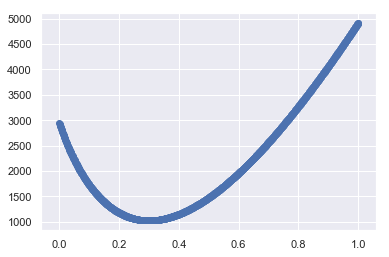

In [55]:
plt.scatter(Omega_m, chi2)

In [56]:
min(chi2)

1027.0485502632646

In [61]:
# np.where(chi2 == min(chi2))
chi2.argmin()

314